In [1]:
###
import numpy as np
subject_mesh = np.load('TemplateBrain-cvs_avg35_inMNI152.npy', allow_pickle=True)[()]
subject_mesh['lh']['vert']
subject_mesh['rh']['vert']

subject_mesh['lh']['vert']

subject_mesh['rh']['vert']
###


array([[ 15.51860523, -87.50492859, -10.42006493],
       [ 14.76780891, -87.48740387, -10.60598946],
       [ 14.06182384, -87.44442749, -10.933321  ],
       ...,
       [ 12.88679886,  68.77381134, -45.20656967],
       [ 12.02162457,  68.5561142 , -45.66609955],
       [  8.85118103,  69.34462738, -45.16750717]])

In [2]:
import plotly_mapper3 as pm3 
fig = pm3.generate_fig(subject_mesh)
fig.write_html("brain_rendered_3d.html")

                    

This is the format of your plot grid:
[ (1,1) scene ]  [ (1,2) x,y   ]



In [3]:
from scipy import io
data_coordinates = io.loadmat('Channel_Coordinates (2).mat')
print(data_coordinates)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed May 10 10:40:06 2023', '__version__': '1.0', '__globals__': [], 'coords': array([[ 12.17473906,   6.27633421, -15.54664555],
       [ 17.03037145,   6.95546319, -16.44310684],
       [ 21.92694084,   7.75862968, -17.33584526],
       [ 26.86354992,   8.56033992, -18.22414501],
       [ 31.71216808,   9.41804087, -19.15081973],
       [ 36.4804721 ,  10.23499712, -19.95213692],
       [ 41.36854747,  11.06522026, -20.82696476],
       [ 46.31310404,  11.9235649 , -21.69515524],
       [ 51.35812006,  12.78388448, -22.54520736],
       [ 20.73221072,  -6.42250836,  -9.29053644],
       [ 25.73719423,  -6.56841433,  -9.59705149],
       [ 30.68747088,  -6.82016591,  -9.87848933],
       [ 35.5924132 ,  -7.08714744, -10.12771152],
       [ 40.62711181,  -7.36067315, -10.38367744],
       [ 45.64984936,  -7.6974287 , -10.5637558 ],
       [ 50.57984178,  -8.11725173, -10.64976964],
       [ 55.61898483,  -8.32666218, -10.

In [4]:
data_coordinates.keys()

dict_keys(['__header__', '__version__', '__globals__', 'coords'])

In [5]:
new_coordinates = data_coordinates['coords']

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from tqdm import tqdm
from scipy import io
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [6]:
data_motifs=io.loadmat('Motifs.mat')
all_motifs=data_motifs['motif']
heatmap_data = all_motifs[0,:,:]
time_intervals = np.arange(0, 0.2304, 0.0009)
    
motif_channel_average = np.mean(all_motifs, axis=2)
motif_channel_average_min = np.min(motif_channel_average,axis=1)[:,None]
motif_channel_average_max = np.max(motif_channel_average,axis=1)[:,None]
normalized_colors = (motif_channel_average-motif_channel_average_min) / (motif_channel_average_max - motif_channel_average_min)

print(all_motifs)
print(all_motifs.shape)

[[[6.48834466e-05 5.83377405e-05 5.98285114e-05 ... 7.39380412e-05
   6.04825036e-05 6.90915040e-05]
  [5.39845569e-05 6.11644355e-05 6.89922526e-05 ... 7.64722281e-05
   5.54370308e-05 6.72215392e-05]
  [5.52985039e-05 5.77254032e-05 7.24608690e-05 ... 5.56276427e-05
   6.62769962e-05 6.57485143e-05]
  ...
  [4.85566416e-05 2.61058049e-05 2.33114315e-05 ... 5.02080220e-05
   3.33815478e-05 2.99567673e-05]
  [4.10054708e-05 3.83313563e-05 4.51091109e-05 ... 3.90305031e-05
   4.62464341e-05 4.12915469e-05]
  [3.71642527e-05 4.49815743e-05 4.03322556e-05 ... 4.18610580e-05
   3.62386163e-05 4.38213428e-05]]

 [[6.94544942e-05 1.24143553e-04 8.72847450e-05 ... 6.01752035e-05
   5.88895164e-05 7.69495455e-05]
  [7.68181926e-05 1.03375358e-04 8.40816501e-05 ... 6.18615886e-05
   5.80364031e-05 7.62445416e-05]
  [6.26120964e-05 5.91211174e-05 6.10016650e-05 ... 5.61835586e-05
   5.26581607e-05 5.13205778e-05]
  ...
  [2.26572756e-05 3.04084970e-05 2.26053762e-05 ... 2.39199089e-05
   2.05904

In [8]:
print(heatmap_data)

[[6.4883447e-05 5.8337740e-05 5.9828511e-05 ... 7.3938041e-05
  6.0482504e-05 6.9091504e-05]
 [5.3984557e-05 6.1164435e-05 6.8992253e-05 ... 7.6472228e-05
  5.5437031e-05 6.7221539e-05]
 [5.5298504e-05 5.7725403e-05 7.2460869e-05 ... 5.5627643e-05
  6.6276996e-05 6.5748514e-05]
 ...
 [4.8556642e-05 2.6105805e-05 2.3311432e-05 ... 5.0208022e-05
  3.3381548e-05 2.9956767e-05]
 [4.1005471e-05 3.8331356e-05 4.5109111e-05 ... 3.9030503e-05
  4.6246434e-05 4.1291547e-05]
 [3.7164253e-05 4.4981574e-05 4.0332256e-05 ... 4.1861058e-05
  3.6238616e-05 4.3821343e-05]]


In [9]:
len(heatmap_data)

63

In [10]:
heatmap_data.shape

(63, 256)

In [11]:
max_z_test=np.amax(heatmap_data[0,:])
print(max_z_test)

0.00010500994


In [12]:
for i in range(len(heatmap_data)):
    max_z_values=np.amax(heatmap_data[i,:])
    print(max_z_values)

0.00010500994
9.249171e-05
9.671727e-05
0.00012653033
0.00013083483
0.00016909032
0.00019762115
0.00020536053
0.00071254116
9.159901e-05
6.739649e-05
6.5926935e-05
7.550883e-05
7.974241e-05
0.00015897203
0.00010894569
0.00017295893
0.0004750812
0.00013895163
9.5148214e-05
7.692878e-05
7.192125e-05
8.542607e-05
9.878538e-05
0.00010803791
9.466549e-05
0.00021655059
0.00013176403
8.7627304e-05
7.119156e-05
9.522879e-05
7.2820076e-05
9.737363e-05
5.828128e-05
7.13235e-05
6.823121e-05
8.145441e-05
6.38674e-05
8.934974e-05
0.00017282479
2.676365e-06
2.331386e-06
7.121256e-05
8.57327e-05
7.9782614e-05
7.1688504e-05
5.8213613e-05
6.183843e-05
5.3780706e-05
5.3164815e-05
6.271083e-05
7.1092014e-05
6.545851e-05
0.00045724597
7.7504534e-05
6.637162e-05
5.9739425e-05
6.239787e-05
6.73488e-05
6.5640605e-05
6.349808e-05
6.0243936e-05
6.471633e-05


In [13]:

matrix = heatmap_data

centers_of_mass = []

for row_values in matrix:
    # Calculate the center of mass
    center_of_mass = np.average(range(len(row_values)), weights=row_values)
    centers_of_mass.append(center_of_mass)

print("Centers of mass:", centers_of_mass)

Centers of mass: [148.8483681629984, 143.379118746783, 135.3383857977179, 130.67035681884852, 131.31205400468306, 123.4624718887252, 120.37522692820576, 126.23345585098568, 120.00531190202717, 146.78482665477867, 146.58827033925044, 148.41899302462554, 141.51250615178287, 130.6675191197222, 126.00652657977716, 131.3406650762192, 124.8758653867373, 127.41313809844085, 149.97404811764363, 145.7750788009944, 145.64861661362286, 138.44539397786102, 131.61029401045306, 127.85543020647239, 128.96533539785278, 130.98955256173087, 128.266453161601, 151.5529349041776, 148.81195672824134, 147.82019143860666, 148.6009154455932, 147.81892512032843, 146.99677979157335, 144.69406639349268, 146.73755758447277, 146.5964891674917, 147.19148977015408, 150.1139944441602, 148.77541730243487, 149.81865375014627, 133.6421282233925, 134.41765698482263, 144.85558149283514, 146.56912944640763, 143.82927182181936, 138.35525464551392, 130.00414912752916, 130.57172008647564, 142.00251634645542, 145.19786499498431

In [32]:
matrices_variable = all_motifs
centers_of_mass_all_matrices = []
means_of_all_matrices = []

for matrix in matrices_variable:
    centers_of_mass = []
    means = []
    for row_values in matrix:
        # Calculate the center of mass
        center_of_mass = np.average(range(len(row_values)), weights=row_values)
        centers_of_mass.append(center_of_mass)
        row_mean = np.mean(row_values)
        means.append(row_mean)
  
    centers_of_mass_all_matrices.append(centers_of_mass)
    means_of_all_matrices.append(means)

print("Centers of mass for each row in all matrices:")
for idx, centers in enumerate(centers_of_mass_all_matrices, 1):
    print(f"Matrix {idx}: {centers}")
    
print("\nAverage Peak Intensity:")
for idx, means in enumerate(means_of_all_matrices, 1):
    print(f"Matrix {idx}: {means}")

Centers of mass for each row in all matrices:
Matrix 1: [148.8483681629984, 143.379118746783, 135.3383857977179, 130.67035681884852, 131.31205400468306, 123.4624718887252, 120.37522692820576, 126.23345585098568, 120.00531190202717, 146.78482665477867, 146.58827033925044, 148.41899302462554, 141.51250615178287, 130.6675191197222, 126.00652657977716, 131.3406650762192, 124.8758653867373, 127.41313809844085, 149.97404811764363, 145.7750788009944, 145.64861661362286, 138.44539397786102, 131.61029401045306, 127.85543020647239, 128.96533539785278, 130.98955256173087, 128.266453161601, 151.5529349041776, 148.81195672824134, 147.82019143860666, 148.6009154455932, 147.81892512032843, 146.99677979157335, 144.69406639349268, 146.73755758447277, 146.5964891674917, 147.19148977015408, 150.1139944441602, 148.77541730243487, 149.81865375014627, 133.6421282233925, 134.41765698482263, 144.85558149283514, 146.56912944640763, 143.82927182181936, 138.35525464551392, 130.00414912752916, 130.57172008647564,

In [36]:
means_of_matrices_np = [np.array(matrix) for matrix in means_of_all_matrices]
print(means_of_matrices_np)

[array([5.04037343e-05, 4.89794475e-05, 5.87065151e-05, 9.46235377e-05,
       9.96816234e-05, 1.06395593e-04, 1.18747739e-04, 1.18614291e-04,
       3.64578620e-04, 3.74171141e-05, 3.05792601e-05, 2.94777201e-05,
       4.22270386e-05, 5.95885213e-05, 1.10049936e-04, 6.73188770e-05,
       1.16212563e-04, 2.70664110e-04, 4.80354138e-05, 3.95299321e-05,
       3.57415702e-05, 4.29135325e-05, 6.09165436e-05, 7.81847702e-05,
       8.46959447e-05, 6.74797921e-05, 1.53955625e-04, 6.06418544e-05,
       4.20900615e-05, 3.49382026e-05, 4.46452104e-05, 3.59361547e-05,
       4.42252785e-05, 3.14911085e-05, 3.41394079e-05, 3.38641439e-05,
       4.22023077e-05, 3.07900555e-05, 4.14934620e-05, 8.61789449e-05,
       1.16818831e-06, 1.07048118e-06, 3.50295632e-05, 4.25713843e-05,
       4.18821437e-05, 4.05400897e-05, 3.76801036e-05, 3.56979435e-05,
       2.80877994e-05, 2.35382777e-05, 3.17156228e-05, 3.47498899e-05,
       3.27816015e-05, 2.05940421e-04, 4.79330447e-05, 3.42391577e-05,
     

In [37]:
sorted_top_values_all_matrices = []

for matrix in means_of_matrices_np:
    # Flatten the matrix into a 1D array
    flat_matrix = matrix.flatten()

    # Sort the values and their indices based on the values
    sorted_indices = np.argsort(flat_matrix)
    sorted_values = flat_matrix[sorted_indices]

    # Calculate the number of elements representing the top 10%
    top_10_percent = int(0.1 * len(sorted_values))

    # Get the indices of the top 10% values
    top_indices = sorted_indices[-top_10_percent:]

    # Sort the top 10% indices based on their original positions
    sorted_top_indices = np.sort(top_indices)

    # Use the sorted top 10% indices to rearrange the corresponding values
    sorted_top_values = flat_matrix[sorted_top_indices]

    # Append the sorted top 10% values to the list
    sorted_top_values_all_matrices.append(sorted_top_values)

# Print sorted top 10% values for each matrix
for idx, values in enumerate(sorted_top_values_all_matrices, 1):
    print(f"Sorted top 10% values for Matrix {idx}:")
    print(values)

Sorted top 10% values for Matrix 1:
[0.00011875 0.00011861 0.00036458 0.00027066 0.00015396 0.00020594]
Sorted top 10% values for Matrix 2:
[0.00043704 0.00018221 0.00038279 0.00030546 0.00055123 0.00029785]
Sorted top 10% values for Matrix 3:
[0.00027633 0.00023221 0.00011112 0.00013115 0.00022884 0.00038547]
Sorted top 10% values for Matrix 4:
[7.5500634e-06 7.8954099e-06 1.0033038e-05 5.3430081e-04 3.1431410e-03
 7.5989965e-06]
Sorted top 10% values for Matrix 5:
[3.3908873e-04 1.9152291e-04 3.2335849e-04 1.2675262e-04 9.8997793e-05
 1.6321358e-04]
Sorted top 10% values for Matrix 6:
[0.00037921 0.00017847 0.00015381 0.0002304  0.0002163  0.00015973]
Sorted top 10% values for Matrix 7:
[1.1778023e-04 9.4827905e-05 1.0182224e-04 1.3055676e-04 1.5539609e-04
 2.7281535e-04]
Sorted top 10% values for Matrix 8:
[2.1624408e-05 1.8398056e-05 1.7067779e-05 2.9991612e-05 1.5401284e-03
 1.9238438e-03]
Sorted top 10% values for Matrix 9:
[8.20451649e-04 8.85366899e-05 9.03550826e-05 4.55603113

In [48]:
rows_of_top_values_all_matrices = []

for matrix in means_of_matrices_np:
    # Flatten the matrix into a 1D array
    flat_matrix = matrix.flatten()

    # Sort the values and their indices based on the values
    sorted_indices = np.argsort(flat_matrix)
    sorted_values = flat_matrix[sorted_indices]

    # Calculate the number of elements representing the top 10%
    top_10_percent = int(0.1 * len(sorted_values))

    # Get the indices of the top 10% values
    top_indices = sorted_indices[-top_10_percent:]

    # Reshape the top indices to match the original matrix shape
    original_shape = matrix.shape
    top_indices_2d = np.unravel_index(top_indices, original_shape)

    # Get the column indices of the top values
    rows_of_top_values = top_indices_2d[0]

    # Append the column indices to the list
    rows_of_top_values_all_matrices.append(rows_of_top_values)

# Print columns of top values for each matrix
for idx, columns in enumerate(columns_of_top_values_all_matrices, 1):
    print(f"Rows of top 10% values for Matrix {idx}:")
    print(columns)

Rows of top 10% values for Matrix 1:
[ 7  6 26 53 17  8]
Rows of top 10% values for Matrix 2:
[ 1 19 11  9  0 18]
Rows of top 10% values for Matrix 3:
[42 43 44 39 27 53]
Rows of top 10% values for Matrix 4:
[ 0 62  8 18 40 41]
Rows of top 10% values for Matrix 5:
[61 60 62 39 53 27]
Rows of top 10% values for Matrix 6:
[11 19  9 18 17  8]
Rows of top 10% values for Matrix 7:
[23 24  3 26 27 53]
Rows of top 10% values for Matrix 8:
[ 9  1  0 18 40 41]
Rows of top 10% values for Matrix 9:
[36 30 31 38 27 39]
Rows of top 10% values for Matrix 10:
[62 42 43 27 44 53]
Rows of top 10% values for Matrix 11:
[ 1 12 20  0 18 19]
Rows of top 10% values for Matrix 12:
[17  6 26  8 27 53]
Rows of top 10% values for Matrix 13:
[34 35 44 62 41 40]
Rows of top 10% values for Matrix 14:
[29 38 31 30 27 39]
Rows of top 10% values for Matrix 15:
[62 42 43 44 27 53]
Rows of top 10% values for Matrix 16:
[ 6  7 53 26 17  8]
Rows of top 10% values for Matrix 17:
[10  0 19 11  9 18]
Rows of top 10% values 

In [ ]:
matrix1 

In [33]:
new_matrix= np.array(new_matrix)
flat_matrix = new_matrix.flatten()
sorted_matrix = np.sort(flat_matrix)[::-1]
top_10_percent = int(0.1 * len(sorted_matrix))
top_values = sorted_matrix[:top_10_percent]
print("Top 10% of values:", top_values)

Top 10% of values: [0.00325475 0.00314314 0.00282266 0.00215962 0.00195913 0.00192384
 0.00187207 0.00186767 0.0018674  0.00180659 0.00177481 0.00176356
 0.00176262 0.0017552  0.00174376 0.00172165 0.00154013 0.00153011
 0.00082045 0.00072938 0.00065577 0.00060021 0.00055123 0.0005343
 0.00050639 0.00047899 0.00046274 0.0004556  0.00044132 0.00043704
 0.00043531 0.00043323 0.00042103 0.0004035  0.00039542 0.00039077
 0.00038757 0.00038547 0.00038459 0.00038279 0.00037921 0.00036458
 0.00036075 0.00035566 0.0003541  0.00035054 0.00034445 0.00034203
 0.00033967 0.00033909 0.00033388 0.00033097 0.00032877 0.00032594
 0.00032336 0.00032298 0.00031501 0.00031334 0.00031099 0.00030546
 0.0003027  0.00030251 0.00030088 0.00029785 0.00029781 0.00029495
 0.00028122 0.00027746 0.00027713 0.00027633 0.00027601 0.00027441
 0.00027282 0.0002724  0.00027066 0.00026612 0.00025967 0.00025861
 0.00025721 0.00025629 0.00025571 0.00025544 0.0002519  0.00025034
 0.0002498  0.00024743 0.00024527 0.0002443 

In [18]:
sorted_indices=np.argsort(flat_matrix)
sorted_values=flat_matrix[sorted_indices]
top_indices = sorted_indices[-top_10_percent:]
sorted_top_indices = np.sort(top_indices)
sorted_top_values = flat_matrix[sorted_top_indices]
print("Sorted top 10% values based on original positions:")
print(sorted_top_values)

Sorted top 10% values based on original positions:
[0.00011875 0.00011861 0.00036458 0.00011005 0.00011621 0.00027066
 0.00015396 0.00020594 0.00043704 0.00018221 0.0001107  0.00038279
 0.00012741 0.00030546 0.00015007 0.00055123 0.00029785 0.00015599
 0.00027633 0.00023221 0.00011112 0.00013115 0.00022884 0.00038547
 0.0005343  0.00314314 0.00033909 0.00019152 0.00032336 0.00012675
 0.00016321 0.0001526  0.00037921 0.00017847 0.00015381 0.00011506
 0.0002304  0.0002163  0.00015973 0.00011778 0.00013056 0.0001554
 0.00027282 0.00154013 0.00192384 0.00082045 0.00011106 0.00215962
 0.00016343 0.00013737 0.00015576 0.00024743 0.00065577 0.00011766
 0.00013265 0.0001573  0.00013571 0.00012061 0.00013106 0.00013052
 0.00011309 0.00015127 0.0001747  0.00018188 0.0001567  0.00010863
 0.00014162 0.00011917 0.0002498  0.00038757 0.00186767 0.0018674
 0.00325475 0.00026612 0.00011165 0.00011466 0.00014316 0.00015895
 0.0002519  0.00032298 0.00012376 0.00013825 0.00011541 0.00011707
 0.00033388 0

[ 0.19413377 27.6364867  89.58033923 38.28162898 61.99310489]


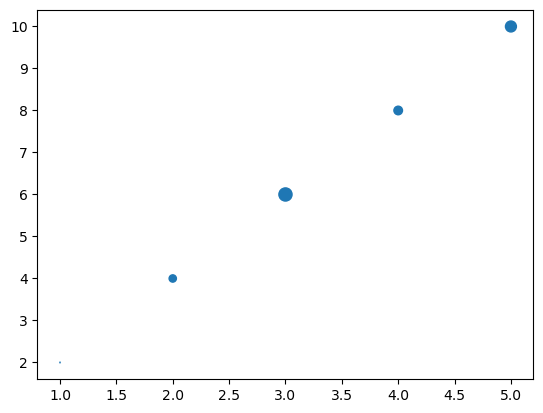

In [19]:
x=[1,2,3,4,5]
y=[2,4,6,8,10]
dot_sizes = 100*np.random.rand(5)
print(dot_sizes)

plt.scatter(x,y, s=dot_sizes)
plt.show()

In [20]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [21]:
print(heatmap_data[0,:])

[6.4883447e-05 5.8337740e-05 5.9828511e-05 6.1422819e-05 4.7578123e-05
 6.6684253e-05 4.8369689e-05 5.5772143e-05 5.7963138e-05 6.4378590e-05
 5.2683121e-05 5.6561883e-05 4.9627026e-05 5.4221320e-05 4.9842474e-05
 5.3297717e-05 4.8435100e-05 5.0940180e-05 5.3520209e-05 4.4511227e-05
 4.3488697e-05 4.8005189e-05 3.9732164e-05 4.5737328e-05 3.3850200e-05
 4.1300642e-05 3.7757043e-05 4.7462825e-05 4.3674663e-05 3.8623155e-05
 4.7916201e-05 3.7621910e-05 3.3733097e-05 4.3242013e-05 3.1026371e-05
 4.1824776e-05 4.2836567e-05 3.9273982e-05 4.2694828e-05 3.3422009e-05
 3.5465586e-05 3.8482285e-05 3.7670048e-05 3.9602168e-05 3.6383455e-05
 3.7051363e-05 3.9950919e-05 3.2760610e-05 3.0804771e-05 3.5160847e-05
 3.2533593e-05 3.5294550e-05 3.3205244e-05 3.0262101e-05 3.3784912e-05
 3.4560857e-05 3.4175209e-05 4.2762225e-05 2.9320436e-05 2.7761755e-05
 3.7120742e-05 3.1080403e-05 3.5505756e-05 3.0211440e-05 3.7045989e-05
 3.5851219e-05 2.8228540e-05 3.2420943e-05 2.9216835e-05 3.2806063e-05
 2.565

In [22]:
matrix.shape

(63, 256)

In [23]:
all_motifs.shape

(45, 63, 256)

In [24]:
heatmap_data.shape

(63, 256)

In [25]:
import numpy as np

# Sample matrices
matrices = [
    np.array([
        [1, 2, 3, 4, 5],
        [2, 3, 4, 5, 6],
        [3, 4, 5, 6, 7]
    ]),
    np.array([
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [90, 3, 3, 3, 3]
    ])
]

centers_of_mass_all_matrices = []

for matrix in matrices:
    centers_of_mass = []
    for row_values in matrix:
        # Calculate the center of mass
        center_of_mass = np.average(range(len(row_values)), weights=row_values)
        centers_of_mass.append(center_of_mass)
    centers_of_mass_all_matrices.append(centers_of_mass)

print("Centers of mass for each row in all matrices:")
for idx, centers in enumerate(centers_of_mass_all_matrices, 1):
    print(f"Matrix {idx}: {centers}")

Centers of mass for each row in all matrices:
Matrix 1: [2.6666666666666665, 2.5, 2.4]
Matrix 2: [2.0, 2.0, 0.29411764705882354]


In [26]:
all_motifs.shape

(45, 63, 256)